In [45]:
# Library imports.
import matplotlib.pyplot as plt
from pathlib import Path

# Urbansurge imports.
from urbansurge import swmm_model

In [46]:
# Figure save path.
fig_savefp = Path(r'C:\Users\ay434\Box\Research\Smart_Stormwater\Fault_Diagnosis_Paper\Manuscript\manuscript-v1\Figures')

In [23]:
# Sensor density.

# Create instance of SWMM model.
config_path = r"C:\Users\ay434\Documents\urbansurge\analysis\lab_system\lab_system_config.yml"
swmm = swmm_model.SWMM(config_path)

# Configure model.
swmm.configure_model()

# Total length of flow path.
total_length = swmm.upstream_distance(20, 'Link', 18, 'Junction')
print(f'Total Length = {total_length} ft')

# Number of sensors at each density.
n_sensors = [10, 5, 4, 3, 2, 1]

# Sensors / distance.
dist = 1000
sensors_per_dist = n_sensors / total_length * dist
print(sensors_per_dist)

Simulation info
Flow Units: CFS
System Units: US
Start Time: 2020-01-01 00:00:00
Start Time: 2020-01-01 06:00:00
Total Length = 2275.0 ft
[4.3956044  2.1978022  1.75824176 1.31868132 0.87912088 0.43956044]


### Fault detection vs sensor density

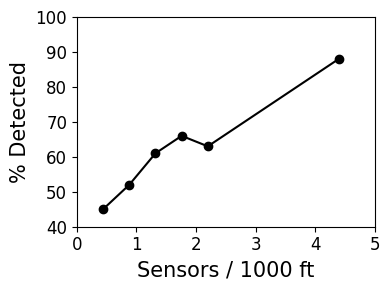

In [51]:
density = [1, 2, 3, 4, 5, 6]
accuracy = [88, 63, 66, 61, 52, 45]

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(sensors_per_dist, accuracy, 'k-o')
ax.set_xlabel(f'Sensors / {dist} ft', fontsize=15)
ax.set_ylabel('% Detected', fontsize=15)
ax.tick_params(axis='both', labelsize=12)
ax.set_xlim([0, 5])
ax.set_ylim([40, 100])
fig.tight_layout()
fig.savefig(fig_savefp / 'sensor_density_detection.png', dpi=300)

### Fault classification vs sensor density

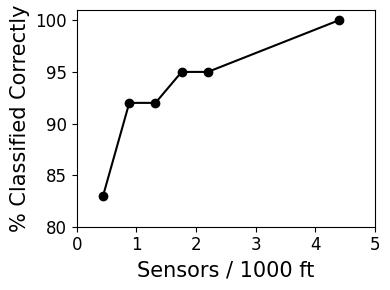

In [47]:
density = [1, 2, 3, 4, 5, 6]
accuracy = [100, 95, 95, 92, 92, 83]

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(sensors_per_dist, accuracy, 'k-o')
ax.set_xlabel(f'Sensors / {dist} ft', fontsize=15)
ax.set_ylabel('% Classified Correctly', fontsize=15)
ax.tick_params(axis='both', labelsize=12)
ax.set_xlim([0, 5])
ax.set_ylim([80, 101])
fig.tight_layout()
fig.savefig(fig_savefp / 'sensor_density_classification.png', dpi=300)

### Fault localization vs sensor density

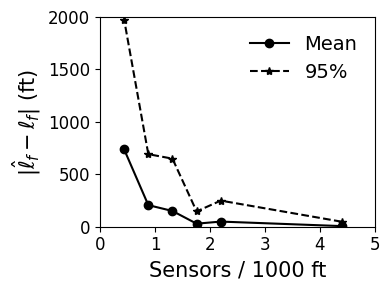

In [48]:
density = [1, 2, 3, 4, 5, 6]
accuracy = [6, 49, 29, 150, 206, 737]
CI = [48, 249, 146, 649, 692, 1973]

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(sensors_per_dist, accuracy, 'k-o', label='Mean')
ax.plot(sensors_per_dist, CI, 'k--*', label='95%')
ax.set_xlabel(f'Sensors / {dist} ft', fontsize=15)
ax.set_ylabel('$|\\hat{\\ell}_f - \\ell_f|$ (ft)', fontsize=15)
ax.tick_params(axis='both', labelsize=12)
ax.legend(fontsize=14, frameon=False)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2000])
fig.tight_layout()
fig.savefig(fig_savefp / 'sensor_density_localization.png', dpi=300)

### Fault characterization vs sensor density